# Model Evaluation and Refinement

In [1]:
import pandas as pd
import numpy as np

# Import clean data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(path)

In [2]:
df.to_csv('module_5_auto.csv')

In [3]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [4]:
%%capture
! pip install ipywidgets

In [5]:
from ipywidgets import interact, interactive, fixed, interact_manual

### Functions for plotting
provided by IBM

In [6]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [7]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

## Part 1: Training and Testing

In [8]:
y_data = df['price']

In [9]:
x_data=df.drop('price',axis=1)

In [10]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


### Question 1
Use the function "train_test_split" to split up the data set such that 40% of the data samples will be utilized for testing, set the parameter "random_state" equal to zero. The output of the function should be the following: "x_train_1" , "x_test_1", "y_train_1" and "y_test_1".

In [12]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_data, y_data, test_size = 0.4, random_state = 0)

### Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lre=LinearRegression()

In [15]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [18]:
# R^2
lre.score(x_test[['horsepower']], y_test)

0.36358755750788263

In [17]:
lre.score(x_train[['horsepower']], y_train)

0.6619724197515104

### Question 2
Find the R^2 on the test data using 40% of the data for training data.

In [31]:
lre_1 = LinearRegression()

In [32]:
lre_1.fit(x_train_1[['horsepower']], y_train_1)

LinearRegression()

In [33]:
lre_1.score(x_test_1[['horsepower']], y_test_1)

0.7139364665406973

### Cross-validation Score

In [23]:
from sklearn.model_selection import cross_val_score

In [25]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [26]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


In [27]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.7224759 ])

### Question 3
Calculate the average R^2 using two folds, find the average R^2 for the second fold utilizing the horsepower as a feature :

In [30]:
Rcross_1 = cross_val_score(lre, x_data[['horsepower']], y_data, cv = 2)
Rcross_1

array([0.59015621, 0.44319613])

In [35]:
Rcross_1.mean()

0.5166761697127429

In [36]:
from sklearn.model_selection import cross_val_predict

In [37]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

# Overfitting, Underfitting and Model Selection

In [38]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [39]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [40]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

### Model evaluating

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

c:\users\youjin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\youjin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


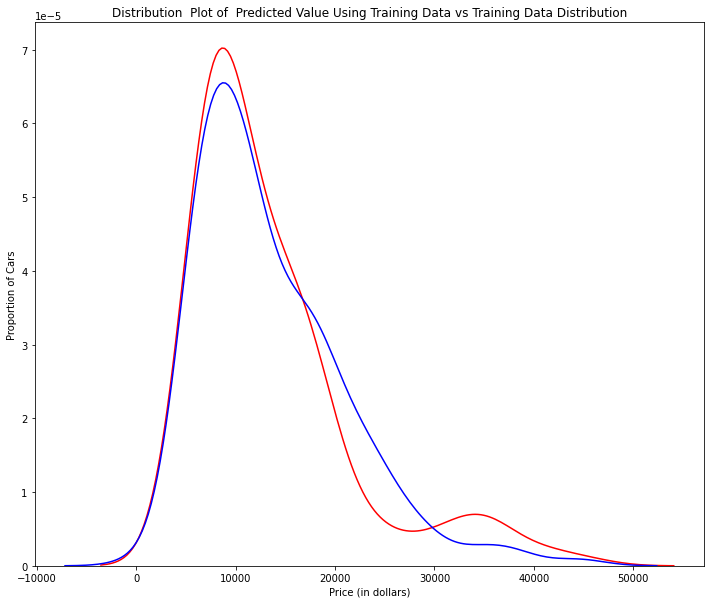

In [42]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

c:\users\youjin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\youjin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


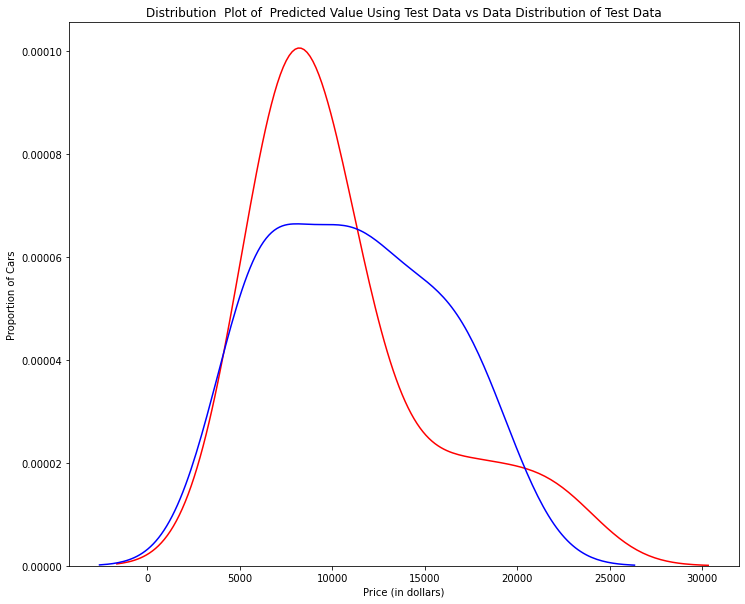

In [43]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

### Overfitting

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [47]:
# a degree 5 polynomial transformation
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [48]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [49]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65566037,  7307.9878638 , 12213.7877412 , 18893.24796457,
       19995.95185894])

In [50]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.65566037  7307.9878638  12213.7877412  18893.24796457]
True values: [ 6295. 10698. 13860. 13499.]


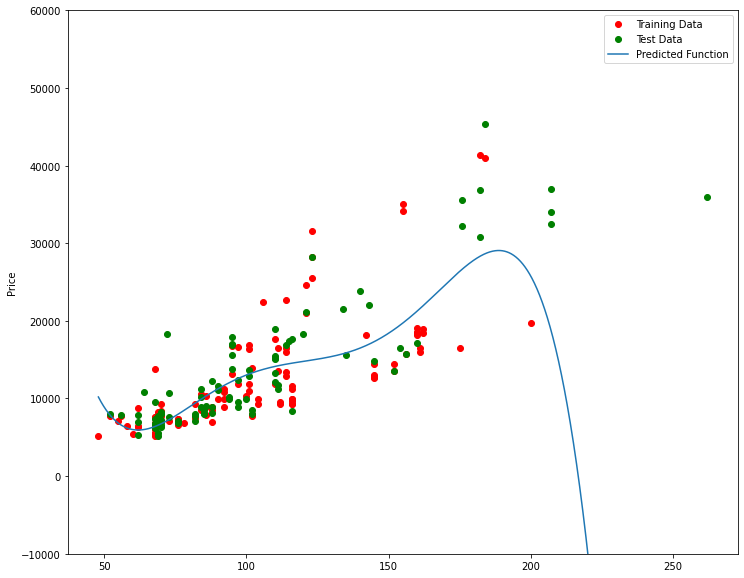

In [51]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [52]:
# R^2 of the training data
poly.score(x_train_pr, y_train)

0.5567716902121724

In [53]:
# R^2 of the test data
poly.score(x_test_pr, y_test)

-29.871340540625788

Text(3, 0.75, 'Maximum R^2 ')

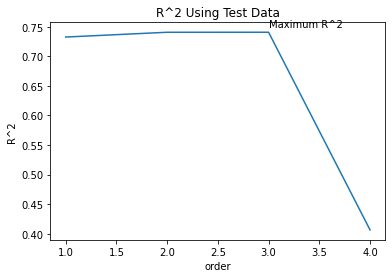

In [54]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')  

In [55]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

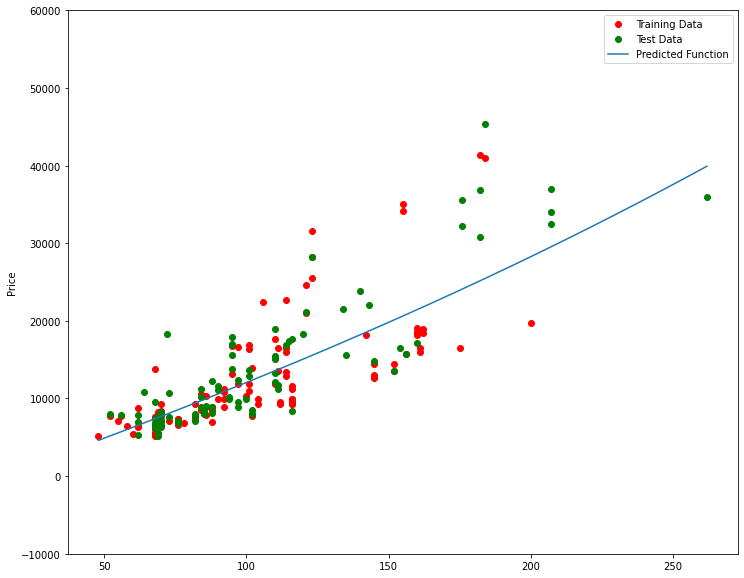

<function __main__.f(order, test_data)>

In [56]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

### Question 4a)
We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two?

In [58]:
pr1 = PolynomialFeatures(degree=2)
pr1

PolynomialFeatures()

### Question 4b)
Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform" ?

In [59]:
x_train_pr1 = pr1.fit_transform(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])

### Question 4c)
How many dimensions does the new feature have?  
Hint: use the attribute "shape"

In [61]:
x_train_pr1.shape

(110, 15)

### Question 4d)
Create a linear regression model "poly1" and train the object using the method "fit" using the polynomial features?

In [62]:
poly1 = LinearRegression()
poly1.fit(x_train_pr1, y_train)

LinearRegression()

### Question 4e)
Use the method "predict" to predict an output on the polynomial features, then use the function "DistributionPlot" to display the distribution of the predicted output vs the test data?

c:\users\youjin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\youjin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


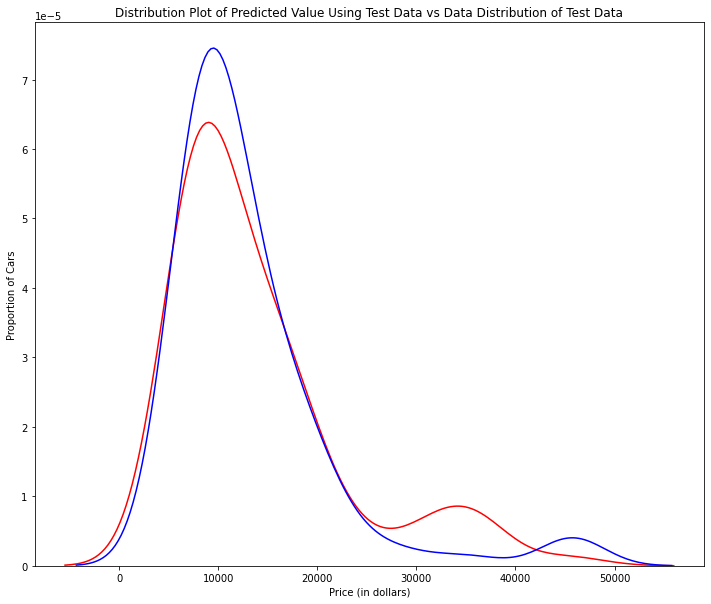

In [63]:
yhat1 = poly1.predict(x_test_pr1)

Title = 'Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat1, "Actual Values (Test)", "Predicted Values (Test)", Title)

### Questioin 4f)
Using the distribution plot above, explain in words about the two regions were the predicted prices are less accurate than the actual prices.

A: The predicted prices are mostly highter than the actual prices around 10000 of the price. Between 30000 and 40000, the predicted prices are mostly lower than the actual prices.

# Ridge Regression

In [64]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [65]:
from sklearn.linear_model import Ridge

In [68]:
RidgeModel=Ridge(alpha=0.1)

In [69]:
RidgeModel.fit(x_train_pr, y_train)

c:\users\youjin\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge(alpha=0.1)

In [70]:
yhat = RidgeModel.predict(x_test_pr)

In [71]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6567.83081933  9597.97151399 20836.22326843 19347.69543463]
test set : [ 6295. 10698. 13860. 13499.]


In [72]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
for alpha in Alpha:
    RidgeModel = Ridge(alpha=alpha) 
    RidgeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RidgeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RidgeModel.score(x_train_pr, y_train))

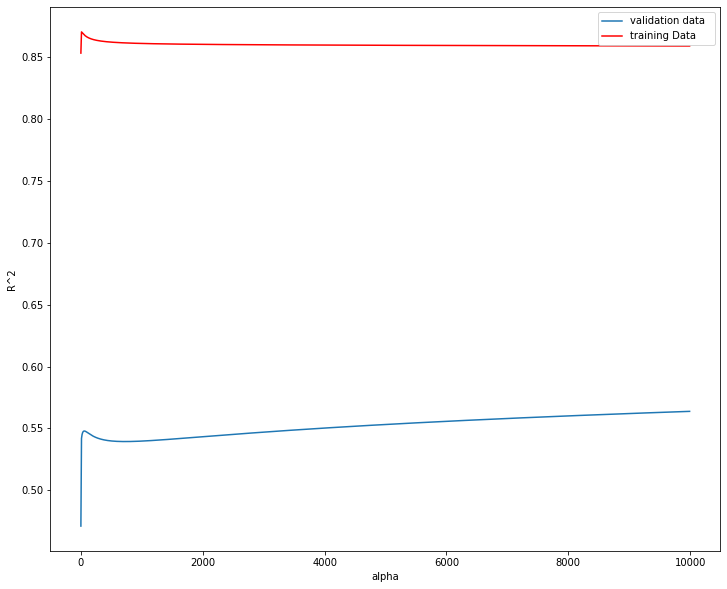

In [73]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

**Figure 6**:The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha. 

### Question 5
Perform Ridge regression and calculate the R^2 using the polynomial features, use the training data to train the model and test data to test the model. The parameter alpha should be set to 10.

In [75]:
RidgeModel1 = Ridge(alpha=10) 
RidgeModel1.fit(x_train_pr, y_train)

Ridge(alpha=10)

In [76]:
RidgeModel.score(x_test_pr, y_test)

0.5637701868992931

# Grid Search

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [81]:
RR=Ridge()
RR

Ridge()

In [82]:
Grid1 = GridSearchCV(RR, parameters1, cv=4)

In [83]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [84]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [85]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036152

### Question 6
Perform a grid search for the alpha parameter and the normalization parameter, then find the best values of the parameters.

In [86]:
parameters2 = [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000], 'normalize' : [True, False]}]
parameters2

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000],
  'normalize': [True, False]}]

In [88]:
Grid2 = GridSearchCV(Ridge(), parameters2, cv = 4)
Grid2.fit(x_data[['horsepower','curb-weight','engine-size','highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000],
                          'normalize': [True, False]}])

In [89]:
Grid2.best_estimator_

Ridge(alpha=0.1, normalize=True)

In [90]:
Grid2.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.840859719294301